#Analysez les ventes d'une librairie avec R ou Python

## Librairies
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp


import warnings
warnings.filterwarnings('ignore')

## Importation des fichiers et nettoyage des données

### Fichier client  -- clt




In [ ]:
clt = pd.read_csv("customers.csv")
clt

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [ ]:
clt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [ ]:
# Controle des doublons
clt.duplicated().sum()

0

In [ ]:
# Controle des genres
clt['sex'].unique()

array(['f', 'm'], dtype=object)

In [ ]:
# On vérifie que les années de naissance soit toutes composé de 4 chiffres
print(clt['birth'].astype(str).str.len().nunique() == 1)

True


### Fichiers produit -- pdt

In [ ]:
pdt = pd.read_csv("products.csv")
pdt

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [ ]:
pdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
pdt.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


Il y a un produit qui a un prix inférieur a 0 

In [ ]:
pdt.loc[pdt['price'] <= 0]

,id_prod,price,categ
731,T_0,-1.0,0


In [ ]:
# Controle des doublons 
pdt["id_prod"].duplicated().sum()

0

In [ ]:
# Nombre des catégories différentes

pdt["categ"].unique()

array([0, 1, 2])

### Fichier des transactions -- trs1

#ANALYSES ANTOINE

In [ ]:
trs = pd.read_csv('transactions.csv') 
trs

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [ ]:
trs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [ ]:
trs.loc[trs['client_id'].isna()]

,id_prod,date,session_id,client_id


In [ ]:
# Nettoyage des doublons

trs.duplicated().sum()

126

In [ ]:
doublons = trs.loc[trs.duplicated(keep= False),:].sort_values(by = 'date', ascending = False)
doublons 


,id_prod,date,session_id,client_id
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
573155,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
621687,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
320833,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
312697,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
...,...,...,...,...
453857,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
606326,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
548383,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1


In [ ]:
# On recherche les lignes du dataframe qui ont une date qui commence par "test"

trs.loc[trs['date'].str.startswith('test')]


,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [ ]:
# On supprime les lignes tests

trs1 = trs.drop(trs[trs.date.str.startswith("test")].index)
trs1


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [ ]:
# Contrôle des doublons

trs1.duplicated().sum()

0

In [ ]:
# Contrôle des valeurs nulles

trs1.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

## CHIFFRE D'AFFAIRE

In [ ]:
# Pour l'analyse des ventes on fait un join inner pour garder seulement les valeurs qui on des correspondances dans les data frames
# Cela enelevera les produit qui n'ont pas fait de vente
# Et aussi supprimera egalement les potentiels produit qui apparaissent dans le df transactions et pas dans le df produit donc des produits non enregistrés

ventes = trs1.merge(pdt , how='inner', on = 'id_prod')
ventes


,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0
...,...,...,...,...,...,...
679106,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,20.99,0
679107,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0
679108,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2.99,0
679109,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,21.82,0


In [ ]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 36.3+ MB


In [ ]:
# Controle de la clé primaire du dataframe ventes 

ventes.duplicated(subset=['client_id','date']).sum()


0

In [ ]:
# Calcul du chiffre d'affaire global

ca = round(ventes["price"].sum(),2)

print("Le chiffre d'affaire global est de " + str(ca) + " €.")

Le chiffre d'affaire global est de 11853728.68 €.


In [ ]:
ventes.sort_values(by='date', ascending=True)

,id_prod,date,session_id,client_id,price,categ
559991,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0
97473,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0
333090,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0
107165,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0
49038,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0
...,...,...,...,...,...,...
270660,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,21.92,1
157295,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2
322694,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1
503273,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0


Les ventes enregistrées sont comprises entre le 1er mars 2021 et le 28 février 2023

In [ ]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   date        679111 non-null  object 
 2   session_id  679111 non-null  object 
 3   client_id   679111 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 36.3+ MB


### **Evolution du CA**

In [ ]:
# EVOLUTION du CA, création de nouvelle colonne par mois, année-mois et trimestre


# Colonne année
ventes['annee'] = pd.DatetimeIndex(ventes['date']).year

# Colonne année+mois
ventes['mois'] = pd.to_datetime(ventes['date']).dt.to_period('M')
ventes['mois'] = ventes['mois'].astype(str)

# Colonne année+mois+jour
ventes['jour'] = pd.to_datetime(ventes['date']).dt.date


# Colonne trimestre
ventes['trimestre'] = pd.to_datetime(ventes['mois']).dt.quarter

ventes.head()


,id_prod,date,session_id,client_id,price,categ,annee,mois,jour,trimestre
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,2022,2022-05,2022-05-20,2
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0,2021,2021-09,2021-09-26,3
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0,2021,2021-05,2021-05-06,2
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0,2022,2022-03,2022-03-16,1
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0,2022,2022-11,2022-11-12,4


In [ ]:
# Chiffre d'affaire groupement par mois
ventes_mois = ventes.groupby(by = 'mois')['price'].sum().to_frame().reset_index()
ventes_mois.head()

,mois,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40


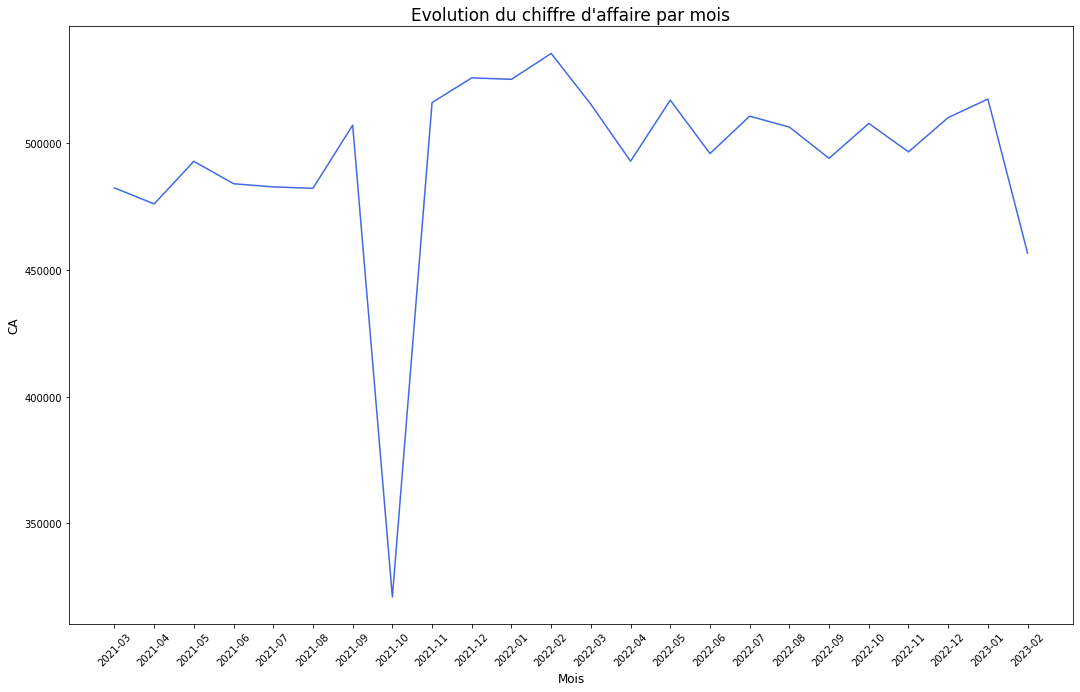

In [ ]:
# Graphique évolution du chiffre d'affaire par mois 

plt.figure(figsize = (18,11))
plt.xlabel("Mois", fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel("CA", fontsize = 12)

plt.title("Evolution du chiffre d'affaire par mois", fontsize = 17)


sns.lineplot(data=ventes_mois, x='mois', y='price', color='royalblue');

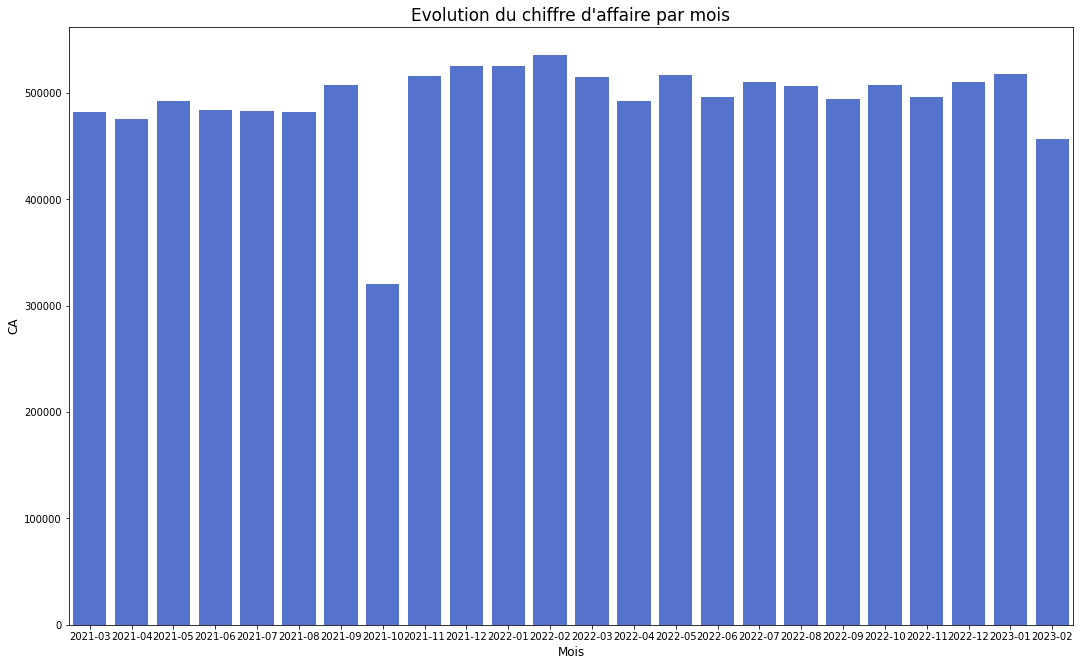

In [ ]:
# Graphique évolution du chiffre d'affaire par mois barplot

plt.figure(figsize = (18,11))



plt.title("Evolution du chiffre d'affaire par mois", fontsize = 17)

sns.barplot(data=ventes_mois, x='mois', y='price', color='royalblue')

plt.xlabel("Mois", fontsize = 12)
plt.ylabel("CA", fontsize = 12);

On constate une évolution du CA en hausse jusqu'au février 2022, puis en légère baisse. Il y a une grosse diminution du chiffre d'affaire au mois d'octobre 2021.

### **Chiffre d'affaire et Volume des ventes par mois et par catégorie**

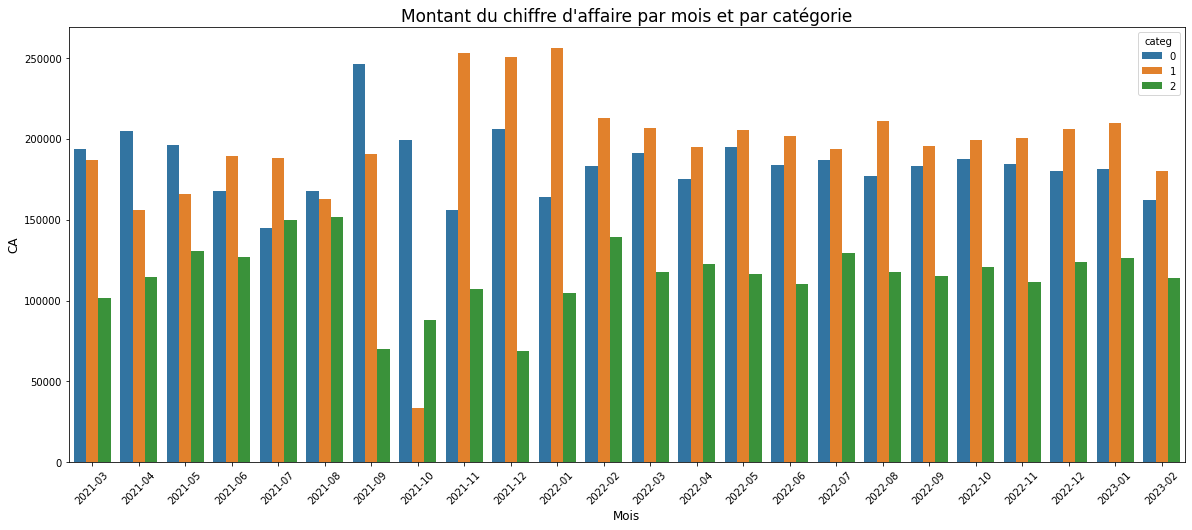

In [ ]:
# Chiffre d'affaire par mois par catégorie

categ_mois = ventes.groupby(by=['mois', 'categ'])['price'].sum().reset_index()


plt.figure(figsize = (20,8))

sns.barplot(data = categ_mois, x='mois', y='price', hue = 'categ')

plt.title("Montant du chiffre d'affaire par mois et par catégorie", fontsize = 17)
plt.xlabel("Mois", fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel("CA", fontsize = 12);



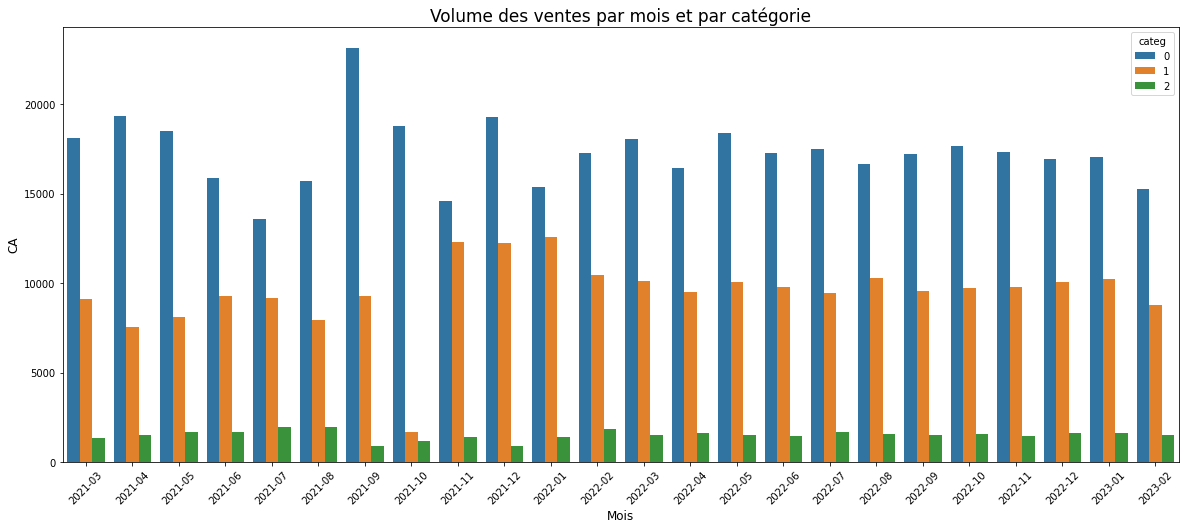

In [ ]:
# En volume

categ_mois_volume = ventes.groupby(by=['mois', 'categ'])['price'].count().reset_index()

plt.figure(figsize = (20,8))

sns.barplot(data = categ_mois_volume, x='mois', y='price', hue = 'categ')

plt.title("Volume des ventes par mois et par catégorie", fontsize = 17)
plt.xlabel("Mois", fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel("CA", fontsize = 12);


Les livres de la catégorie 0 sont les plus vendus, suivi des livres de catégorie 1 et ceux de la catégorie 2 sont les moins vendus.

### **Analyse des prix selon la catégorie**

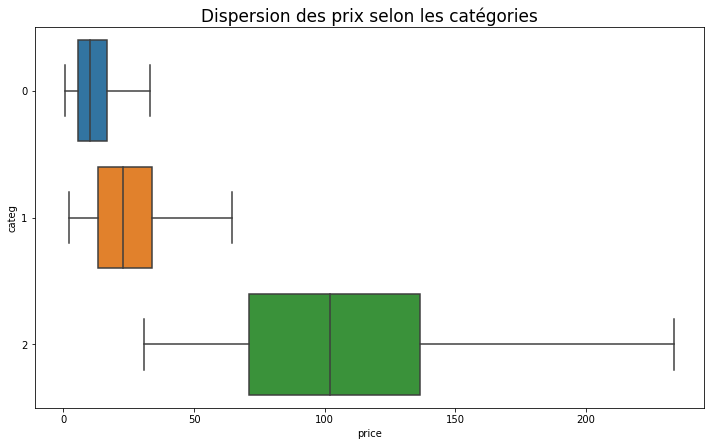

In [ ]:
# Supression du pdt test
pdt1 = pdt.drop(pdt[(pdt['price'] <0)].index)

# Boxplot par catégorie

plt.figure(figsize = (12,7))

sns.boxplot(data=pdt1 ,x='price', y='categ', showfliers=False, orient='h')

plt.title("Dispersion des prix selon les catégories", fontsize = 17);


Les ventes peuvent s'expliquer par l'analyse des prix des livres.



Les livres de catégorie 2 sont beaucoup plus cher que les deux autres.

### **CA par catégories**

In [ ]:
ventes_categ = ventes.groupby(by='categ')['price'].sum().reset_index()
ventes_categ

,categ,price
0,0,4419730.97
1,1,4653722.69
2,2,2780275.02


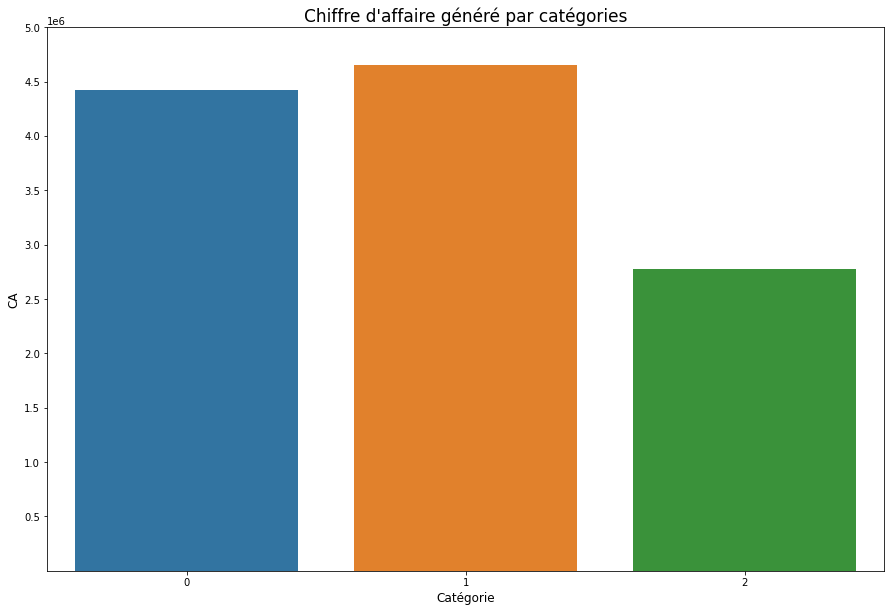

In [ ]:
# Participation des catégories au chiffre d'affaire

plt.figure(figsize = (15,10))

sns.barplot(data = ventes_categ, x='categ' , y='price' )

plt.title("Chiffre d'affaire généré par catégories", fontsize = 17)
plt.xlabel("Catégorie", fontsize = 12)
plt.ylabel("CA", fontsize = 12);

plt.yticks([500000,2000000, 3000000,2500000,1500000,1000000,3500000,4000000,4500000,5000000]);


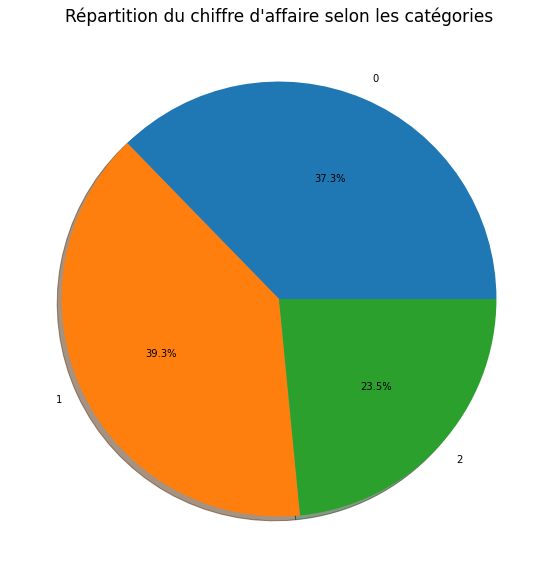

In [ ]:
# Graphique camembert pour la répartition du chiffre d'affaire par catégorie au total


plt.figure(figsize = (15,10))

plt.title("Répartition du chiffre d'affaire selon les catégories", fontsize=17)

plt.pie(ventes_categ['price'], labels = ventes_categ['categ'] , autopct='%1.1f%%', shadow=True);

#### **Anomalie du mois d'octobre 2021**

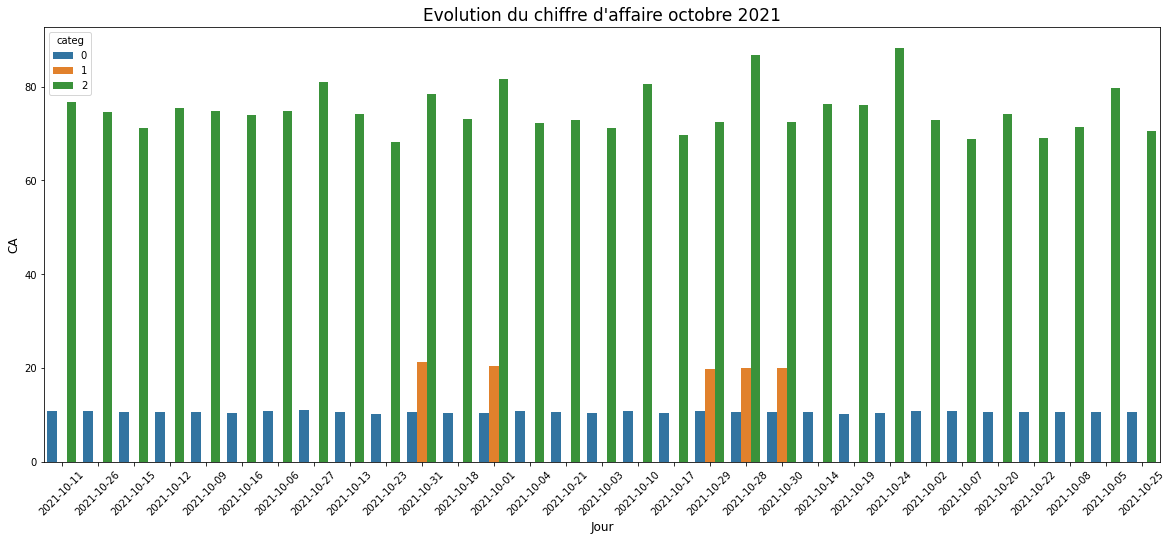

In [ ]:
# Décomposition du chiffre d'affaire du mois d'octobre 2021

octobre = ventes.loc[(ventes["mois"] == "2021-10"),['jour', 'price','categ']]

octobre.groupby(by =['jour', 'categ']).sum().sort_values(by='jour', ascending = False)

plt.figure(figsize = (20,8))

sns.barplot(data = octobre, x='jour', y='price',hue='categ', ci=None)

plt.title("Evolution du chiffre d'affaire octobre 2021", fontsize = 17)
plt.xlabel("Jour", fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel("CA", fontsize = 12);

Il y a eu récupération des ventes suelement sur 5 jours dans le mois d'octobre.

2 hypothèses :


*   Pour les ventes du mois d'octobre 2021, il y a des données qui n'ont pas été récupérées correctement. 
*   Cela peut être dû également à un retrait volontaire de ces produit par la librairie ?



 



### **CA par trimestre**

In [ ]:
# On regroupe par année et par trimestre

ventes_trimestre = ventes.groupby(['annee','trimestre']).agg(CA=('price', sum)).reset_index()
ventes_trimestre

,annee,trimestre,CA
0,2021,1,482440.61
1,2021,2,1453141.33
2,2021,3,1472360.87
3,2021,4,1362883.75
4,2022,1,1576367.02
5,2022,2,1506147.66
6,2022,3,1511364.92
7,2022,4,1514802.21
8,2023,1,974220.31


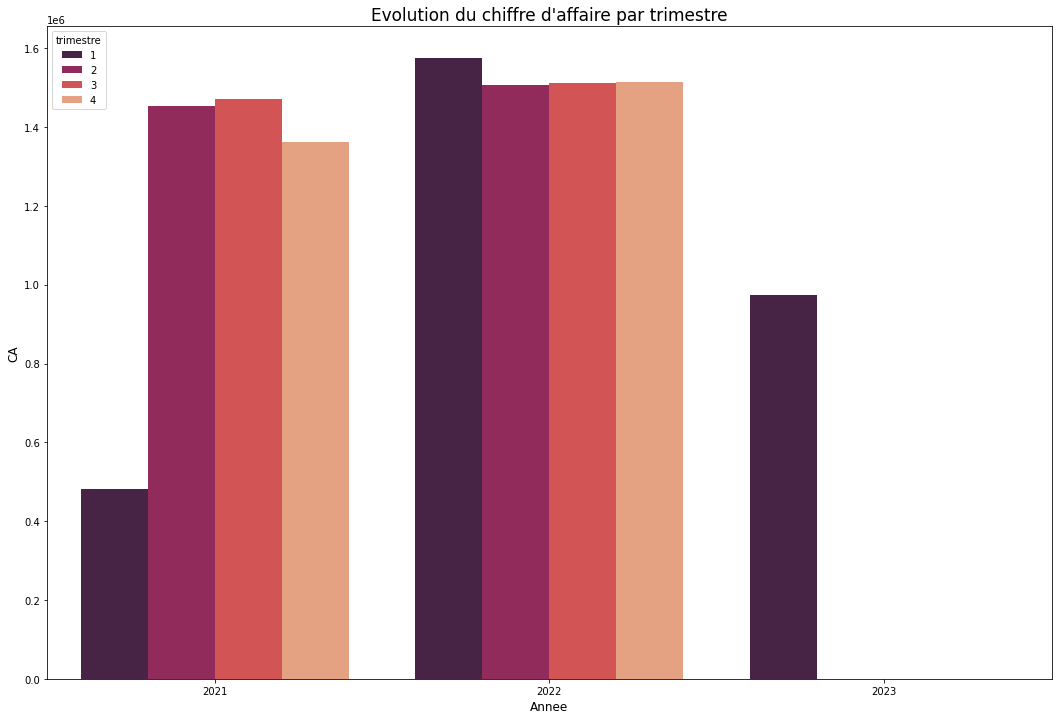

In [ ]:
# Evolution du chiffre d'affaire par année et par trimestre

plt.figure(figsize = (18,12))

sns.barplot(data=ventes_trimestre , x='annee', y='CA', hue='trimestre', palette='rocket')

plt.title("Evolution du chiffre d'affaire par trimestre", fontsize = 17)
plt.xlabel("Annee", fontsize = 12)
plt.ylabel("CA", fontsize = 12);

### Décomposition en moyenne mobile




Les moyennes mobiles permettent de lisser les valeurs, et de diminuer les petites fluctuations entre les périodes données.

In [ ]:
# Calcul des moyennes mobiles sur 3 périodes

ventes_mois["moyenne_mobile"] = ventes_mois["price"].rolling(3).mean()
ventes_mois

,mois,price,moyenne_mobile
0,2021-03,482440.61,NaN
1,2021-04,476109.30,NaN
2,2021-05,492943.47,483831.126667
3,2021-06,484088.56,484380.443333
4,2021-07,482835.40,486622.476667
5,2021-08,482284.79,483069.583333
6,2021-09,507240.68,490786.956667
7,2021-10,320798.74,436774.736667
8,2021-11,516167.73,448069.050000
9,2021-12,525917.28,454294.583333


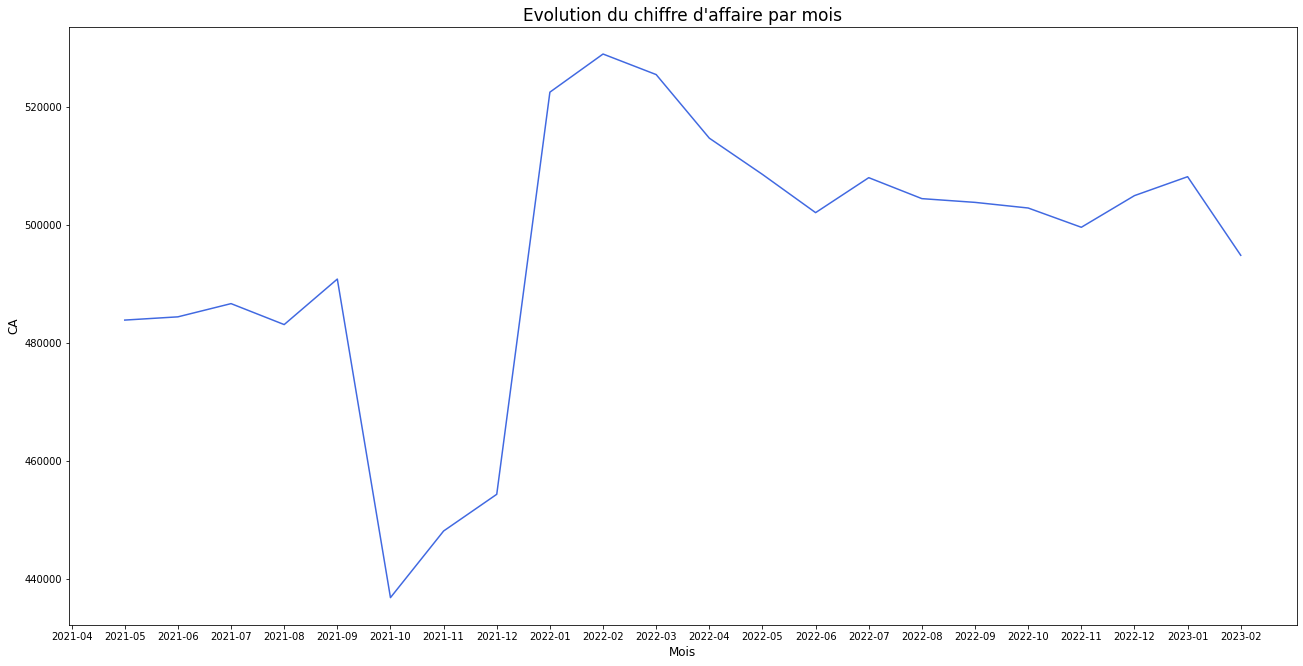

In [ ]:

plt.figure(figsize = (22,11))
plt.xlabel("Mois", fontsize = 12)
plt.ylabel("CA", fontsize = 12)

plt.title("Evolution du chiffre d'affaire par mois", fontsize = 17)


sns.lineplot(data=ventes_mois, x='mois', y='moyenne_mobile', color='royalblue');


### Courbe de Lorenz

In [ ]:
ventes

,id_prod,date,session_id,client_id,price,categ,annee,mois,jour,trimestre
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,2022,2022-05,2022-05-20,2
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0,2021,2021-09,2021-09-26,3
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0,2021,2021-05,2021-05-06,2
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0,2022,2022-03,2022-03-16,1
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0,2022,2022-11,2022-11-12,4
...,...,...,...,...,...,...,...,...,...,...
679106,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,20.99,0,2021,2021-06,2021-06-23,2
679107,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0,2021,2021-12,2021-12-24,4
679108,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2.99,0,2021,2021-10,2021-10-16,4
679109,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,21.82,0,2021,2021-03,2021-03-17,1


In [ ]:
# On calcul de chiffre d'affaire pour chaque client, dataframe clt_lrz

clt_lrz = ventes.groupby(by = 'client_id')['price'].sum().reset_index().sort_values(by='price',ascending = True)
clt_lrz

,client_id,price
8151,c_8351,6.31
7918,c_8140,8.30
7889,c_8114,9.98
1556,c_240,11.06
4044,c_4648,11.20
...,...,...
2513,c_3263,5276.87
2724,c_3454,113637.93
6337,c_6714,153598.92
4388,c_4958,289760.34


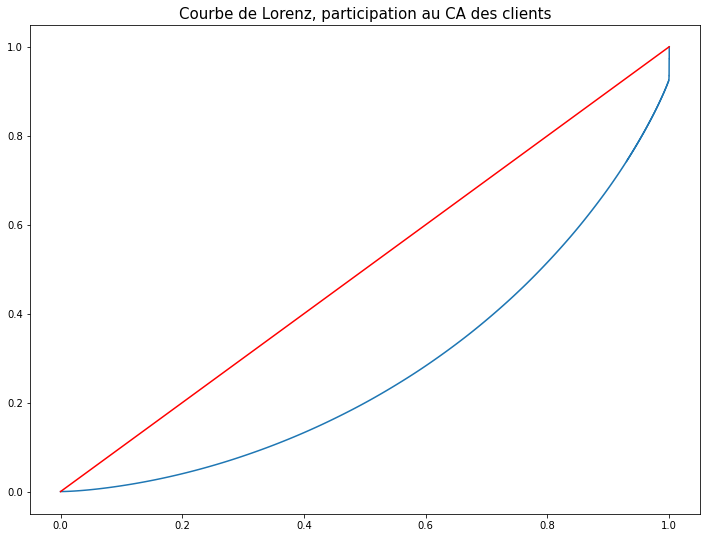

indice de Gini: 0.447


In [ ]:
# Courbe de Lorenz de la participation des clients au chiffre d'affaire

dep = clt_lrz['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure (figsize= (12,9))
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
cb_lorenz = plt.plot(xaxis,lorenz,drawstyle='steps-post')
cb_lorenz = plt.plot([0, 1], [0, 1], color = 'red', linestyle = 'solid',label="Courbe d'égalité parfaite")

plt.title('Courbe de Lorenz, participation au CA des clients', fontsize = 15)

plt.show()

# Indice de gini
aire_ss_courbe_CA_client = lorenz[:-1].sum() / len(lorenz)
S_ca_client = 0.5 - aire_ss_courbe_CA_client
gini_CA_client = 2*S_ca_client
print("indice de Gini:",round(gini_CA_client,3))

Environ 50 % du CA est généré par 20% des clients 

## TOPS et FLOPS des livres

>> ###            TOPs












In [ ]:
classement = trs1.groupby('id_prod')['session_id'].count().sort_values(ascending=False).reset_index()

top10 = classement.head(10)
top10

,id_prod,session_id
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
5,1_403,1960
6,1_412,1951
7,1_413,1945
8,1_406,1939
9,1_407,1935


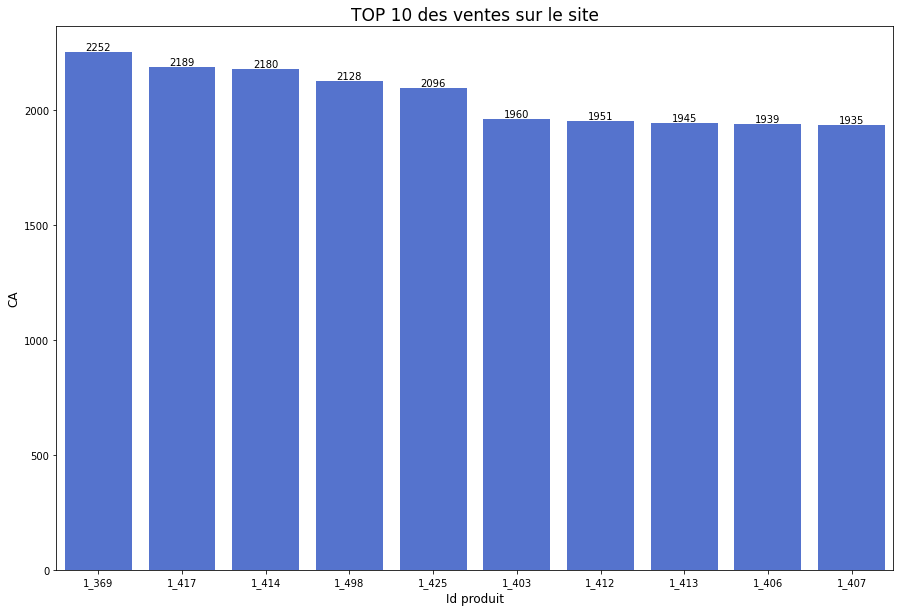

In [ ]:
# Graphique du TOP 10 des ventes de la librairie

plt.figure(figsize = (15,10))



plt.title("TOP 10 des ventes sur le site", fontsize = 17)

tops10 = sns.barplot(data=top10,  y='session_id', x='id_prod' , orient = "v", color = 'royalblue')

plt.xlabel("Id produit", fontsize = 12)
plt.ylabel("CA", fontsize = 12)


for index, row in top10.iterrows():
  # Récupérer la position de la barre sur l'axe x et la valeur de la barre sur l'axe y
  x = index
  y = row['session_id']

  # Ajouter une étiquette de texte avec la valeur de la barre
  label = '{:}'.format(y)
  plt.text(x, y, label, ha='center', va='bottom')
#axes.bar_label(tops10.containers[1])


>> ### FLOPs

In [ ]:
# FLOPS parmis les vendus 

flops = classement.sort_values(by= 'session_id' ,ascending = True).head(20)
flops

,id_prod,session_id
3265,0_886,1
3248,2_98,1
3249,2_23,1
3250,0_1379,1
3251,0_1601,1
3252,0_833,1
3253,0_1633,1
3254,0_1683,1
3255,0_807,1
3264,0_541,1


In [ ]:
# Jointure OUTER qui nous permet d'avoir tous les id_produit, meme ceux qui n'ont pas généré de vente

ventes_0 = trs1.merge(pdt, on='id_prod', how ='outer')
ventes_0

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0.0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0.0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0.0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0.0
...,...,...,...,...,...,...
679349,0_1624,NaN,NaN,NaN,24.50,0.0
679350,2_86,NaN,NaN,NaN,132.36,2.0
679351,0_299,NaN,NaN,NaN,22.99,0.0
679352,0_510,NaN,NaN,NaN,23.66,0.0


In [ ]:
## Les flops sont ceux qui n ont pas ete vendus pas ceux qui ont ete le moins vendus parmis ceux qui ont eu des ventes

invendus = ventes_0.loc[ventes_0['session_id'].isna(),]
invendus[{'id_prod', "session_id"}].head(10)

,session_id,id_prod
679332,NaN,0_1016
679333,NaN,0_1780
679334,NaN,T_0
679335,NaN,0_1062
679336,NaN,0_1119
679337,NaN,0_1014
679338,NaN,1_0
679339,NaN,0_1318
679340,NaN,0_1800
679341,NaN,0_1645


## ANALYSE CLIENTS



### CA par clients

In [ ]:
df_client_ca = ventes.groupby('client_id')['price'].sum().reset_index()
df_client_ca.sort_values(by ="price", ascending = False)

,client_id,price
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153598.92
2724,c_3454,113637.93
2513,c_3263,5276.87
...,...,...
4044,c_4648,11.20
1556,c_240,11.06
7889,c_8114,9.98
7918,c_8140,8.30


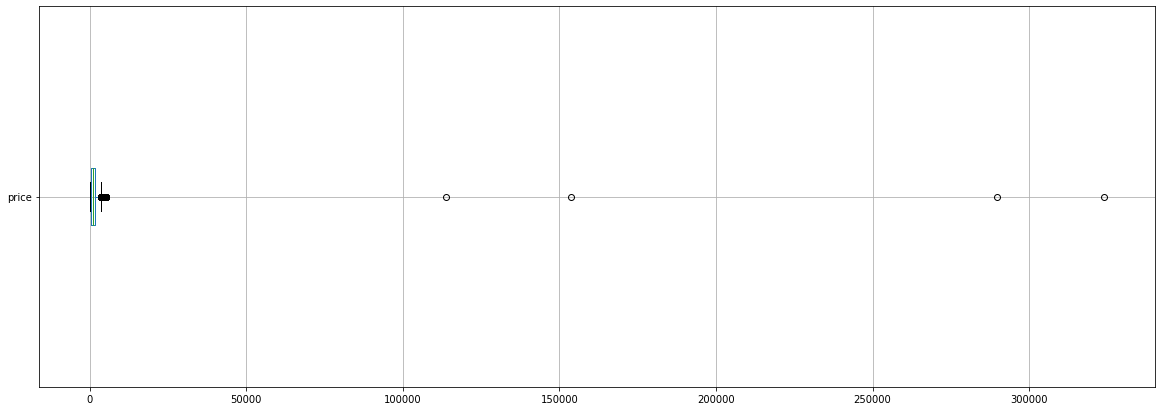

In [ ]:
# Boxplot pour mettre en valeur les 4 clients qui achètent le plus

df_client_ca[['price']].boxplot(figsize = (20,7), vert= False, manage_ticks= True)

In [ ]:
list_outliers = ['c_1609', 'c_4958' ,'c_6714', 'c_3454']

In [ ]:
client_outliers = df_client_ca[df_client_ca.client_id.isin(list_outliers)]


In [ ]:
ca_client_outlier = round(client_outliers["price"].sum(),2)
pct_ca_outlier = round((ca_client_outlier*100)/ca,2)

pct_outlier = round(4*100/df_client_ca['client_id'].nunique(),2)

print("Le CA des 4 plus gros clients représente " + str(pct_ca_outlier)+ ' % du CA')
print()
print('Ils représentent ' +str(pct_outlier) + ' % des clients.')

Le CA des 4 plus gros clients représente 7.43 % du CA

Ils représentent 0.05 % des clients.


### Proportion des clients selon le genre

In [ ]:
# Création clolonne age 

clt['age'] = 2023 - clt['birth'] 
clt

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80
...,...,...,...,...
8618,c_7920,m,1956,67
8619,c_7403,f,1970,53
8620,c_5119,m,1974,49
8621,c_5643,f,1968,55


In [ ]:
clt_nb = clt.groupby(by='age')['client_id'].count()
clt_nb

age
19    440
20    146
21    146
22    129
23    136
     ... 
90      8
91      6
92      4
93      4
94      3
Name: client_id, Length: 76, dtype: int64

In [ ]:
clt_f = clt.loc[clt['sex']== 'f',:].sort_values(by='age' ,ascending = False)
clt_m = clt.loc[clt['sex']== 'm',:]

clt_f

,client_id,sex,birth,age
2491,c_8362,f,1929,94
1086,c_3218,f,1930,93
3994,c_4679,f,1930,93
5138,c_7232,f,1930,93
5988,c_418,f,1931,92
...,...,...,...,...
2290,c_5427,f,2004,19
2333,c_6378,f,2004,19
385,c_6237,f,2004,19
8209,c_5316,f,2004,19


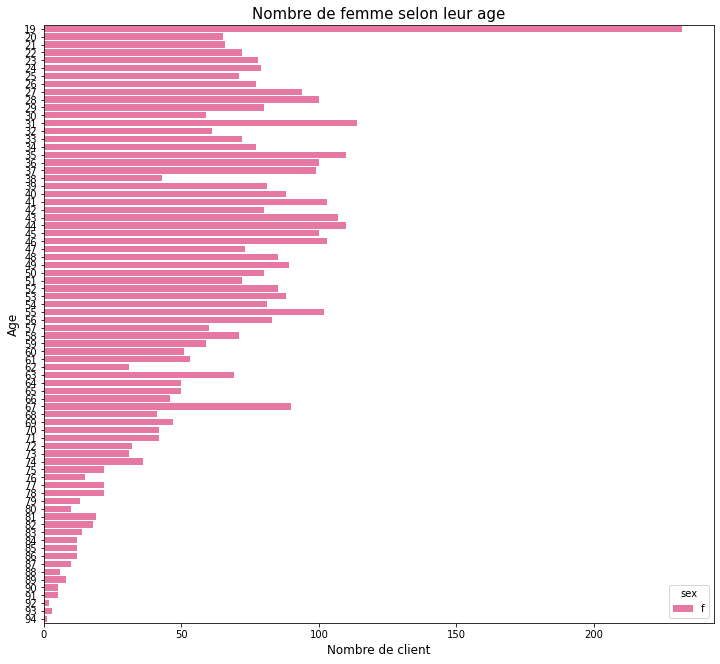

In [ ]:
# Graphique femme/age

plt.figure(figsize = (12,11))

pyramid = sns.countplot(data = clt_f, y='age' , hue='sex',palette='RdPu')

plt.title('Nombre de femme selon leur age', fontsize = 15)
plt.xlabel("Nombre de client", fontsize = 12)
plt.ylabel("Age", fontsize = 12)

plt.show()


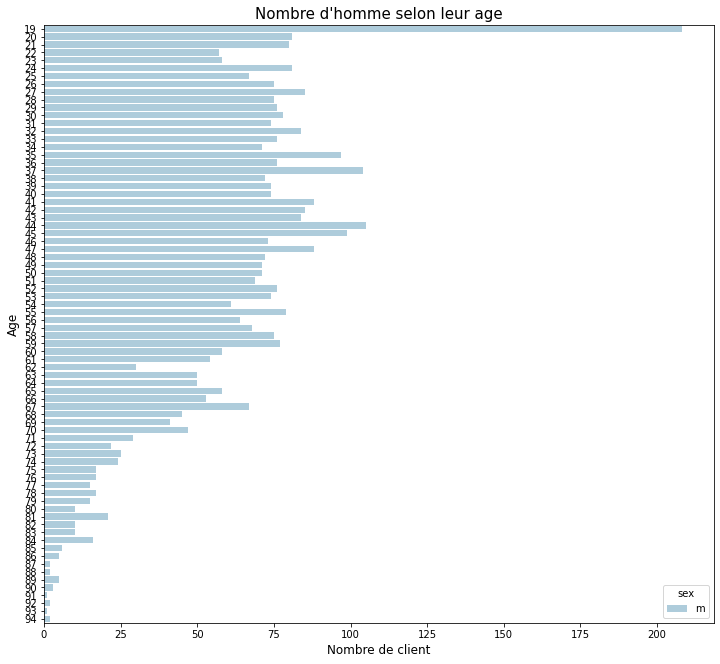

In [ ]:
# Graphique homme/age

plt.figure(figsize = (12,11))

pyramid2 = sns.countplot(data = clt_m, y='age' , hue='sex', palette=('Paired'))

plt.title("Nombre d'homme selon leur age", fontsize = 15)
plt.xlabel("Nombre de client", fontsize = 12)
plt.ylabel("Age", fontsize = 12);


<Figure size 1440x936 with 0 Axes>

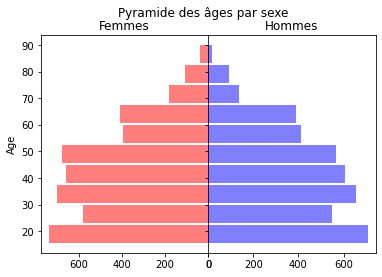

In [ ]:
plt.figure(figsize = (20,13))


# Créer 2 figured et un axe
fig, ax = plt.subplots(1,2, sharey=True)

fig.suptitle('Pyramide des âges par sexe')

# Histogramme à barres verticales pour les hommes
ax[1].hist(clt_m['age'] , align='left', histtype='bar', orientation='horizontal', color='blue', alpha=0.5, rwidth=0.9)
ax[1].set_title('Hommes')



# Histogramme à barres verticales pour les femmes
ax[0].hist(clt_f['age'], align='left', histtype='bar', orientation='horizontal', color='red', alpha=0.5, rwidth=0.9)
ax[0].invert_xaxis()
ax[0].set_title('Femmes')
ax[0].set_ylabel('Age')


plt.subplots_adjust(wspace=0)

# Afficher la figure
plt.show();

In [ ]:
# Nombre de client

clt['client_id'].count()


8623

In [ ]:
genre = clt.groupby("sex")['client_id'].count().reset_index()
genre["sex"] = genre['sex'].replace(['f','m'],['femme', 'homme'])
genre.rename(columns = {'client_id': 'Nombre'}, inplace = True)
genre

,sex,Nombre
0,femme,4491
1,homme,4132


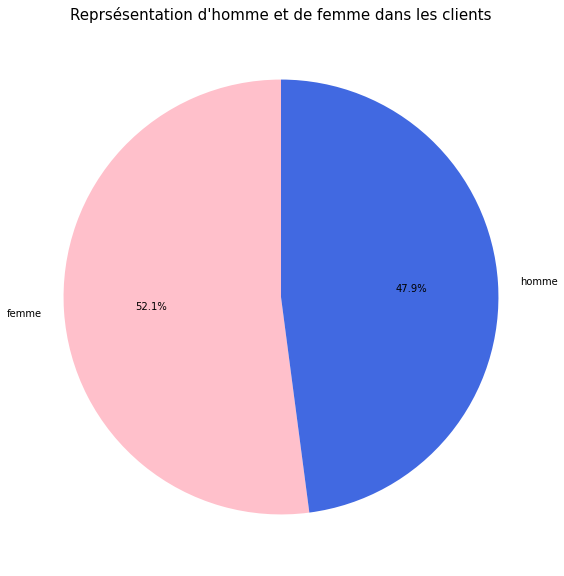

In [ ]:
# Proportionn des hommes et femmes dans les clients 


plt.figure(figsize = (11,10))

plt.pie(data=genre, labels ='sex', x ='Nombre',autopct='%1.1f%%', colors=('pink','royalblue'), startangle=90)

plt.title("Reprsésentation d'homme et de femme dans les clients", fontsize = 15);

# ANALYSES JULIE

## LIEN GENRE ET CATEGORIE ACHETE (qualitatif/qualitatif)

In [ ]:
ventes

,id_prod,date,session_id,client_id,price,categ,annee,mois,jour,trimestre
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,2022,2022-05,2022-05-20,2
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0,2021,2021-09,2021-09-26,3
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0,2021,2021-05,2021-05-06,2
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0,2022,2022-03,2022-03-16,1
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0,2022,2022-11,2022-11-12,4
...,...,...,...,...,...,...,...,...,...,...
679106,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,20.99,0,2021,2021-06,2021-06-23,2
679107,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0,2021,2021-12,2021-12-24,4
679108,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2.99,0,2021,2021-10,2021-10-16,4
679109,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,21.82,0,2021,2021-03,2021-03-17,1


In [ ]:
# On crée un nouveau data frame en fusionant le dataframe vente et client pour avoir les données sur les clients

df_complet  = ventes.merge(clt , on ='client_id' , how="inner")
df_complet

,id_prod,date,session_id,client_id,price,categ,annee,mois,jour,trimestre,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,2022,2022-05,2022-05-20,2,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0,2021,2021-07,2021-07-20,3,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0,2022,2022-08,2022-08-20,3,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0,2022,2022-06,2022-06-18,2,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0,2021,2021-08,2021-08-18,3,f,1986,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2,2021,2021-07,2021-07-23,3,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0,2022,2022-03,2022-03-25,1,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0,2021,2021-09,2021-09-25,3,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2,2021,2021-03,2021-03-11,1,m,1992,31


In [ ]:
# Les catégories achetés selon le genre du client tableau de contingence

genre_categ = pd.pivot_table(df_complet, values = 'session_id' ,index ='sex' , columns='categ', aggfunc = 'count')
genre_categ

categ,0,1,2
sex,,,
f,206103,114899,17283
m,209356,112270,19200


Les deux variables sont qualitatives on utilise un test de hCHi2 pour tester l'hypothese nulle : absence de relation entre le genre et la catégorie.

In [ ]:
# Corrélation par chi2

sp.stats.chi2_contingency(genre_categ)



(147.11906816131497,
 1.1310980597090762e-32,
 2,
 array([[206952.24759281, 113159.50583189,  18173.2465753 ],
        [208506.75240719, 114009.49416811,  18309.7534247 ]]))

La p valeur est inférieur a 5% donc on rejette l hytpothese nulle, comme quoi il n'y a pas de lien entre le genre et la catégorie acheté.

La p-value est petite il y a donc il y a un lien entre le sexe du client et la catégorie de livre qu'il achète.

Un test de Cramer peut être utiliser pour compléter le test de Chi2, pour connaitre l'intensité de la relation entre les variables.

In [195]:
#Test de cramer

chi2 = sp.stats.chi2_contingency(genre_categ)[0]
n = genre_categ.sum().sum()
dl = sp.stats.chi2_contingency(genre_categ)[2]

V = np.sqrt(chi2 / (n*dl))
print('La valeur V du test de Cramer est égale à ' + str(V)+ '.' )

if V < 0.10:
    print("La relation est faible ou nulle.")
elif V < 0.20:
    print("La relation est faible.")
elif V < 0.3:
    print("La relation est moyenne.") 
else :
    print("La relation est forte.") 


La valeur V du test de Cramer est égale à 0.010407564291273038.
La relation est faible ou nulle.


La relation entre le sexe client et la catégorie acheté est failble voire nulle.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##  AGE DES CLIENTS / TOTAL DES ACHATS (quantitatif/quantitatif)




In [ ]:
df_complet  = ventes.merge(clt , on ='client_id' , how="inner")
df_complet

,id_prod,date,session_id,client_id,price,categ,annee,mois,jour,trimestre,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,2022,2022-05,2022-05-20,2,f,1986,37
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0,2021,2021-07,2021-07-20,3,f,1986,37
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0,2022,2022-08,2022-08-20,3,f,1986,37
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0,2022,2022-06,2022-06-18,2,f,1986,37
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0,2021,2021-08,2021-08-18,3,f,1986,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2,2021,2021-07,2021-07-23,3,f,2001,22
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0,2022,2022-03,2022-03-25,1,f,1960,63
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0,2021,2021-09,2021-09-25,3,f,1960,63
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2,2021,2021-03,2021-03-11,1,m,1992,31


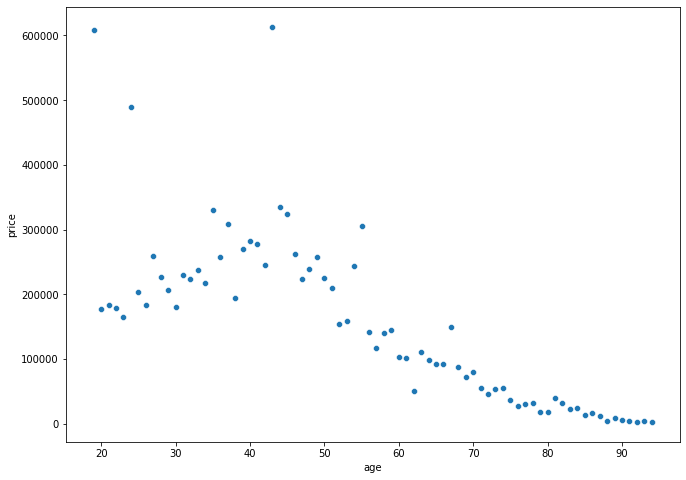

In [ ]:
# Dispersion : Montant des achats selon l'âge des clients

age_montant = df_complet.groupby('age')['price'].sum()


plt.figure(figsize = (11,8))
sns.scatterplot(data= age_montant);


In [ ]:
sp.stats.shapiro(age_montant)

ShapiroResult(statistic=0.8878952860832214, pvalue=6.316070539469365e-06)

In [ ]:
age_montant = age_montant.reset_index()

On observe graphiquement que la dispersion des deux valeurs n'est pas linéaire on utilise donc spearman, pour analyser.

In [ ]:
#Coefficient de corrélation non linéaire, Spearman

coef_achats_age = sp.stats.spearmanr(age_montant['age'], age_montant['price'])
coef_achats_age

SpearmanrResult(correlation=-0.8576076555023923, pvalue=4.57972879340901e-23)

Il y a une corrélation négative entre l'age et le montant de l'achat, et plus l'age augmente plus le montant d'achat est supposé diminuer.

##  AGE / NOMBRE D'ACHAT SELON L'AGE (quantitatif/quantitatif)

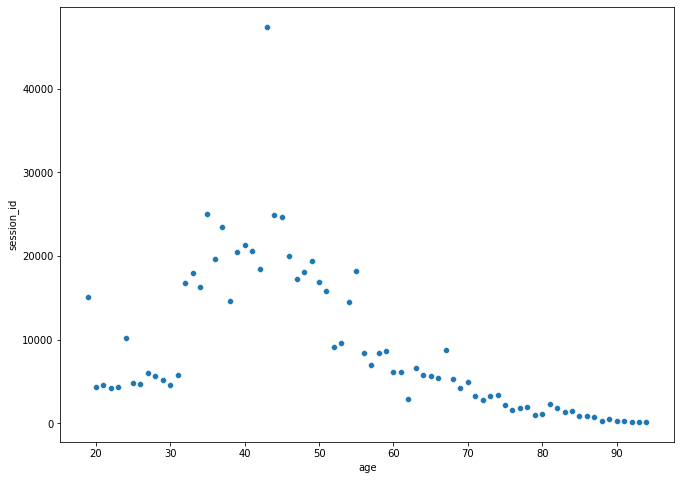

In [ ]:
# En nombre d'achat selon l'age des clients , soit la fréquence d'achat selon l'age

nbr_achats_age = df_complet.groupby("age")["session_id"].count()

plt.figure(figsize = (11,8))
sns.scatterplot(data= nbr_achats_age);

In [ ]:
# Test de normalité avec le test de Shapiro Wilk 
# Hypothèse nulle : l'échantillon suit une loi normale. Par conséquent si la p-value du test est significative, l'échantillon ne suit pas une loi normale.

sp.stats.shapiro(nbr_achats_age)

ShapiroResult(statistic=0.8338267207145691, pvalue=8.646505733622689e-08)

La p-value est inférieure a 0.05 donc on rejette l'hypothese nulle, la dispersion ne suit pas une loi normale

In [ ]:
nbr_achats_age = nbr_achats_age.reset_index()

In [ ]:
#Coefficient de corrélation linéaire de spearman

coef_nbr_age = sp.stats.spearmanr(nbr_achats_age['age'], nbr_achats_age['session_id'])
coef_nbr_age

SpearmanrResult(correlation=-0.6845979808634354, pvalue=9.17297066447968e-12)


La p valeur indique que la répartition n'est pas due au hasard.


## AGE / FREQUENCE D'ACHAT (quantitatif/quantitatif)

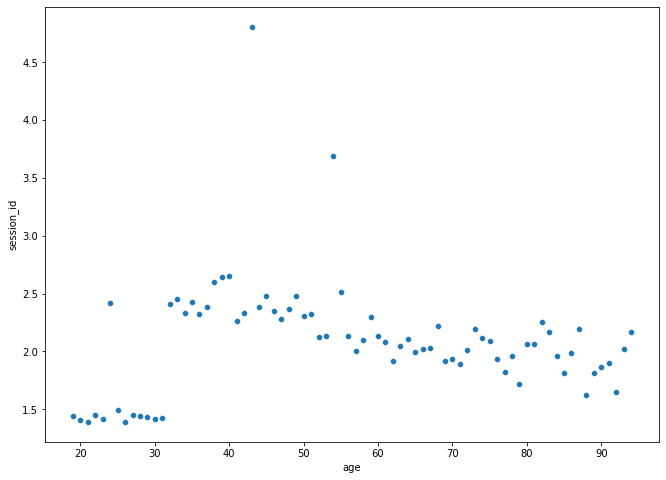

In [ ]:
# Panier moyen par age des clients

freq = df_complet.groupby(by =["client_id",'mois','age'])['session_id'].nunique().reset_index()
freq_client = freq.groupby('client_id' ,as_index=False).agg({'session_id': 'mean', 'age': 'first'})
freq_age = freq_client.groupby(by='age')['session_id'].mean()



# Graphique de dispersion

plt.figure(figsize = (11,8))
sns.scatterplot(data = freq_age)


In [ ]:
#Coefficient de corrélation linéaire de Pearson

freq_age = freq_age.reset_index()
coef_freq_age = sp.stats.pearsonr(freq_age['session_id'], freq_age['age'])
coef_freq_age

(0.019383502843740297, 0.8680023353890877)

La p value est supérieure a 0.05 donc l'hypotese nulle est validée, le coefficient de corélation indique un failbe corélation,les deux varialdes ne sont pas liées.

## AGE / CATEGORIES ACHETEES (quantitatif/qualitatif)


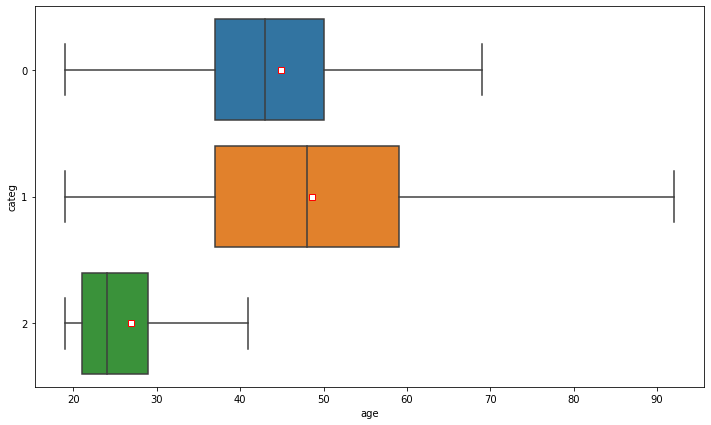

In [ ]:
# Représentation graphique boxplot

plt.figure(figsize = (12,7))

sns.boxplot(data=df_complet ,x='age', y='categ',showmeans=True , showfliers=False, orient='h', meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"red"} );


In [214]:
# Moyenne d'age et ecart-type des clients selon les catégories

age_categ = df_complet.groupby('categ' ,as_index=False)['age'].agg( ['mean', 'std'])

age_categ

,mean,std
categ,,
0,44.897446,11.209687
1,48.651238,15.495910
2,26.948031,9.798143


In [231]:
# On créer des groupes pour chaque catégorie acheté avec l'age des clients.

age_categ0 = df_complet.loc[df_complet["categ"] == 0]['age']
age_categ1 = df_complet.loc[df_complet["categ"] == 1]['age']
age_categ2 = df_complet.loc[df_complet["categ"] == 2]['age']


In [228]:
# On vérifie que l'age suit une distribution normale

stats , p_value = sp.stats.shapiro(df_complet['age'])


if p_value < 0.05:
    print("On rejette l'hypothese nulle, l'age ne suit pas une distribution normale, on utilise le test Kurskal-Wallis.")
else:
    print("On accepte l'hypothese nulle, l'age suit une distribution normale, on utilise ANOVA.")

On rejette l'hypothese nulle, l'age ne suit pas une distribution normale, on utilise le test Kurskal-Wallis.


In [234]:
# Analyse de l'effet de la catégorie sur l'age : Test de Kurskal-Wallis 

stats, p_value = sp.stats.kruskal(age_categ0,age_categ1, age_categ2)

print(stats)
print(p_value)

79346.09938564085
0.0


La p_value est inférieure à 0.05, on rejette l'hypothèse nulle qu'il n'y ai pas de lien entre les deux variables. 

Il y a un lien entre la catégorie de livre acheté et l'age du client.


Nous aurons donc plus tendance à mettre en avant les livres de catégorie 2 pour les 20 - 40 ans, la catégorie 1 pour les 40-60 ans et la catégorie les 40-50 ans .

- Les analyses nous permettent de voir les liens entre le genre du client et les catégorie de livre achetés : Il y a un lien entre les deux, mais l'intensité de ce lien est très faible.

- Plus le client est agé moins il est susceptible d'acheté durant et en plus faible quantité

- La fréquence d'achat n'est pas corrélé avec l'age du client.

- Il y a une différence significative de l'age des clients selon les catégories de livres. On peut aussi voir cette différence sur la boite a moustache. 